In [1]:
!pip install sktime

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sktime.datasets import load_airline

y=load_airline()
y

#항공노선의 승객수

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [4]:
y.index=y.index.to_timestamp()
y

Period
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Name: Number of airline passengers, Length: 144, dtype: float64

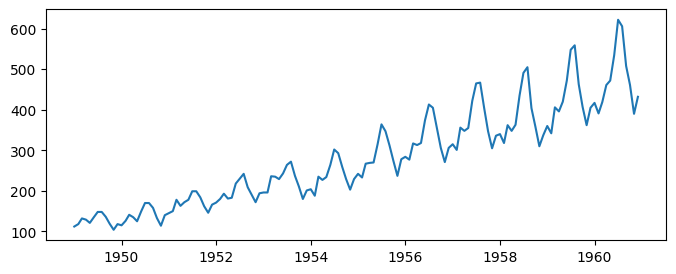

In [5]:
plt.figure(figsize=(8,3))
plt.plot(y)
plt.show()

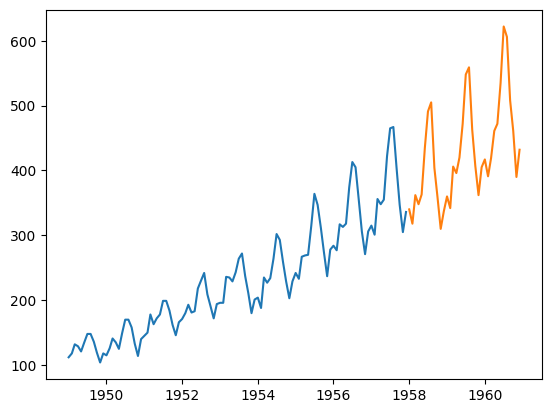

In [6]:
#temporal_train_test_split시간에 따라 train과 test를 분할해달라

from sktime.forecasting.model_selection import temporal_train_test_split


y_train, y_test=temporal_train_test_split(y)
plt.figure()
plt.plot(y_train)
plt.plot(y_test)
plt.show()

In [7]:
temporal_train_test_split(y)

[Period
 1949-01-01    112.0
 1949-02-01    118.0
 1949-03-01    132.0
 1949-04-01    129.0
 1949-05-01    121.0
               ...  
 1957-08-01    467.0
 1957-09-01    404.0
 1957-10-01    347.0
 1957-11-01    305.0
 1957-12-01    336.0
 Freq: MS, Name: Number of airline passengers, Length: 108, dtype: float64,
 Period
 1958-01-01    340.0
 1958-02-01    318.0
 1958-03-01    362.0
 1958-04-01    348.0
 1958-05-01    363.0
 1958-06-01    435.0
 1958-07-01    491.0
 1958-08-01    505.0
 1958-09-01    404.0
 1958-10-01    359.0
 1958-11-01    310.0
 1958-12-01    337.0
 1959-01-01    360.0
 1959-02-01    342.0
 1959-03-01    406.0
 1959-04-01    396.0
 1959-05-01    420.0
 1959-06-01    472.0
 1959-07-01    548.0
 1959-08-01    559.0
 1959-09-01    463.0
 1959-10-01    407.0
 1959-11-01    362.0
 1959-12-01    405.0
 1960-01-01    417.0
 1960-02-01    391.0
 1960-03-01    419.0
 1960-04-01    461.0
 1960-05-01    472.0
 1960-06-01    535.0
 1960-07-01    622.0
 1960-08-01    606.0
 1960

In [8]:
y_test.index

DatetimeIndex(['1958-01-01', '1958-02-01', '1958-03-01', '1958-04-01',
               '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01',
               '1958-09-01', '1958-10-01', '1958-11-01', '1958-12-01',
               '1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01', '1959-11-01', '1959-12-01',
               '1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Period', freq='MS')

In [9]:
#ForecastingHorizon 데이터를 boxing해주는 용도

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster

#Fasle로 하면은 트레인 종료지점이 어디든 상관없이 그냥 인덱스에 해당하는 날짜에 값을 예측을 해준다.
#해당하는 날짜의 값을 얻고싶으니까 relative의 값은 false로 해주면돼요 false
#뚝 떨어진 날짜도 할수있다

y = load_airline()
y_train, y_test = temporal_train_test_split(y)

y_fh = ForecastingHorizon(y_test.index, is_relative=False)
fc = ThetaForecaster(sp=12)
fc.fit(y_train)
p_test = fc.predict(y_fh)
p_test

# sp가 머냐면은 시즈널 피리오드 긍까 계절성 주기가 몇이냐 라고 지정해두는 인자가 있어요 이제 얘가?
# 몇 해를 기준으로 계절성을 가지느냐 그니까 얘는 1년을 기준으로 왓다갔다 여름이고 겨울이고 눈금하나마다 두번 반복되죠
# 얘 계절 주기는 1년인거고 한 스텝이 데이터보시면 한 스텝이 한 달이죠? 그면은 한 계절 주기가 몇 스텝이냐 하면은? 12죠 12개월
# 12를 sp자리에 숫자로 넣어주심 됩니다
#sp 계별성 주기 지정해주는 인자

Period
1958-01    341.456422
1958-02    337.564661
1958-03    388.128055
1958-04    372.625120
1958-05    371.882597
1958-06    421.552202
1958-07    461.671562
1958-08    457.651131
1958-09    407.134111
1958-10    354.872813
1958-11    309.248681
1958-12    351.290690
1959-01    355.075758
1959-02    350.984167
1959-03    403.506705
1959-04    387.340913
1959-05    386.520892
1959-06    438.091373
1959-07    479.725747
1959-08    475.489959
1959-09    422.952449
1959-10    368.616151
1959-11    321.186583
1959-12    364.808052
1960-01    368.695095
1960-02    364.403672
1960-03    418.885355
1960-04    402.056706
1960-05    401.159186
1960-06    454.630544
1960-07    497.779932
1960-08    493.328786
1960-09    438.770787
1960-10    382.359489
1960-11    333.124485
1960-12    378.325414
Freq: M, Name: Number of airline passengers, dtype: float64

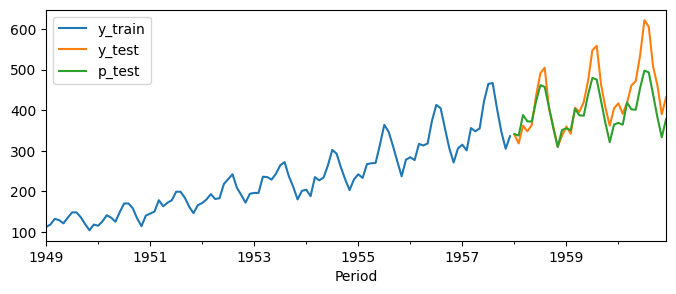

In [10]:
plt.figure(figsize=(8, 3))
y_train.plot(label='y_train')
y_test.plot(label='y_test')
p_test.plot(label='p_test')
plt.legend()
plt.show()

In [11]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, p_test)

0.08174636612807698

In [12]:
from sktime.datasets import load_arrow_head

X,y = load_arrow_head()
y

array(['0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0',
       '1', '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '1',
       '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split(X,y)

In [14]:
X_train

,dim_0
129,0 -1.860771 1 -1.857602 2 -1.81762...
61,0 -1.854100 1 -1.833880 2 -1.81870...
17,0 -1.653743 1 -1.650974 2 -1.63187...
80,0 -1.187945 1 -1.217061 2 -1.18555...
68,0 -1.895550 1 -1.896260 2 -1.88025...
...,...
132,0 -2.311013 1 -2.308359 2 -2.29690...
102,0 -2.014505 1 -1.992179 2 -1.95198...
140,0 -1.969782 1 -1.981786 2 -1.94342...
98,0 -1.947090 1 -1.940457 2 -1.92236...


In [15]:
#알아서 최적의 interval을 찾는다.

from sktime.classification.interval_based import TimeSeriesForestClassifier

forest = TimeSeriesForestClassifier()
forest.fit(X_train, y_train)
p_test = forest.predict(X_test)
p_test

array(['2', '0', '1', '1', '0', '2', '1', '0', '0', '1', '0', '0', '1',
       '2', '1', '0', '2', '2', '1', '1', '1', '2', '0', '0', '2', '1',
       '0', '1', '1', '0', '2', '0', '1', '2', '0', '0', '1', '1', '1',
       '2', '1', '0', '2', '2', '0', '1', '2', '1', '1', '2', '0', '0',
       '0'], dtype='<U1')

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, p_test)

0.7735849056603774

In [21]:
from sktime.clustering.k_means import TimeSeriesKMeans

km=TimeSeriesKMeans(n_clusters=5, init_algorithm= 'forgy', metric='dtw')

km.fit(X_train)

TimeSeriesKMeans(init_algorithm='forgy', n_clusters=5)

<Figure size 500x1000 with 0 Axes>

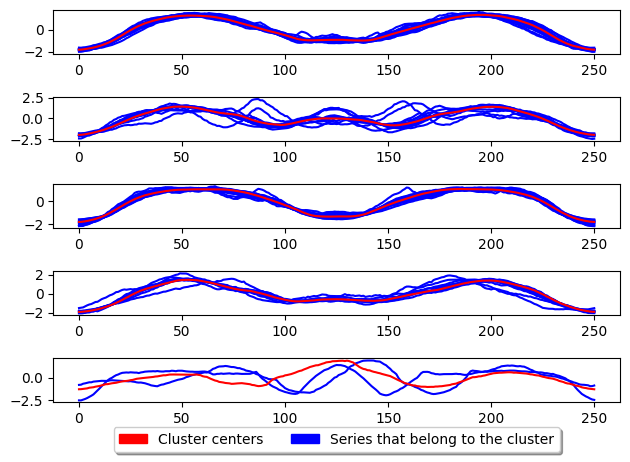

In [24]:
from sktime.clustering.utils.plotting._plot_partitions \
import plot_cluster_algorithm

plot_cluster_algorithm(km, X_test, km.n_clusters)

### sliding_window_view 

In [27]:
df=pd.DataFrame([[10.6,0],[7.3,0],[7.0,0],[11.2,1],[18.4,1]])

df

,0,1
0,10.6,0
1,7.3,0
2,7.0,0
3,11.2,1
4,18.4,1


In [29]:
X=df.iloc[:,0].values #넘파이 형태로 뽑기
y=df.iloc[:,1].values
X

array([10.6,  7.3,  7. , 11.2, 18.4])

In [37]:
#시계열을 어떻게 뽑느냐?for문 돌리기


#stride=시계열의 길이

stride=2


X_t =[]
for i in range(1,len(X)):  #애초에 값이 만들어질 수 있느냐. 0번부터가 아니라 1번부터해준다.
   # print(X[i-1:i+1], y[i]) #i 이전 -1 스텝에서부터 i까지 
     print(X[i-(stride-1):i+1], y[i])
     X_t.append(X[i-(stride-1):i+1])
np.array(X_t) #넘파이 배열로 바꾸기
X_t   
    
    

[10.6  7.3] 0
[7.3 7. ] 0
[ 7.  11.2] 1
[11.2 18.4] 1


[array([10.6,  7.3]),
 array([7.3, 7. ]),
 array([ 7. , 11.2]),
 array([11.2, 18.4])]

In [39]:
y[stride-1:]

array([0, 0, 1, 1], dtype=int64)

In [40]:
#슬라이딩 윈도우 기법 

np.lib.stride_tricks.sliding_window_view(X, window_shape=stride)


array([[10.6,  7.3],
       [ 7.3,  7. ],
       [ 7. , 11.2],
       [11.2, 18.4]])